# 反応する

In [1]:
a = 3
b = 4
print(a + b)

7


## 反応しない と思ったがした

In [2]:
import numpy as np
x = np.linspace(0, 1, 1024)
y = x ** 2.4
print(y)

[  0.00000000e+00   5.97445754e-08   3.15333760e-07 ...,   9.95314337e-01
   9.97655564e-01   1.00000000e+00]


### 流石にこれは反応しないでしょ。

# 単色画像作成

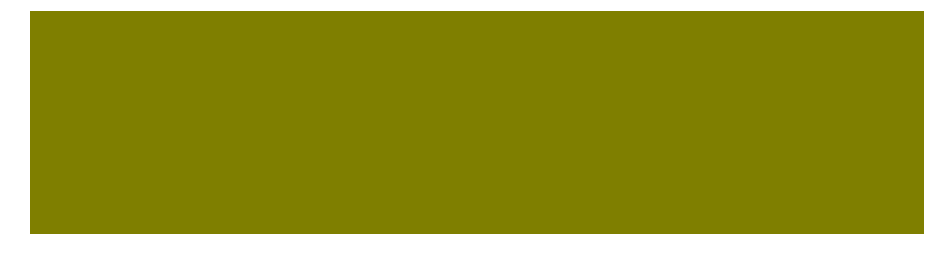

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

width = 640
height = 160

"""
変数 color で色を指定。特に断りがなければ配列で設定する。
idxの若い方から順に R,G,B の順。
値域は 0～1。
例を以下に示す。
　灰色：(0.5, 0.5, 0.5)
　赤色：(1, 0, 0)
  黄色：(1, 1, 0)
"""
color = (0.5, 0.5, 0.0)

# 全ての値が1の画像を生成
# --------------------------------
img = np.ones(shape=(height, width, 3), dtype=np.float64)  # height, width の順序に注意

# color の内容に img のデータを書き換える
# -----------------------------------------
color = np.array(color)
img[:, :] = color

# ファイル出力のために int型 に変換
# -------------------------------------
output_dtype = np.uint8
output_fname = 'hoge.tif'
img_max_value = np.iinfo(output_dtype).max
out_img = np.round(img * img_max_value)  # 最大値をint型に合わせる
out_img = out_img.astype(output_dtype)   # 型をfloatからintに変換
cv2.imwrite(output_fname, out_img[:, :, ::-1])  # opencv の関数は GBR基準なので RGBに並べ替える

# 画像表示
# ------------------
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(111)
ax1.set_axis_off()
ax1.imshow(img)
plt.show()

# 単色グラデーション作成(基本編)
ここでは、float型で良い感じのグラデーションを作成する方法を紹介する。

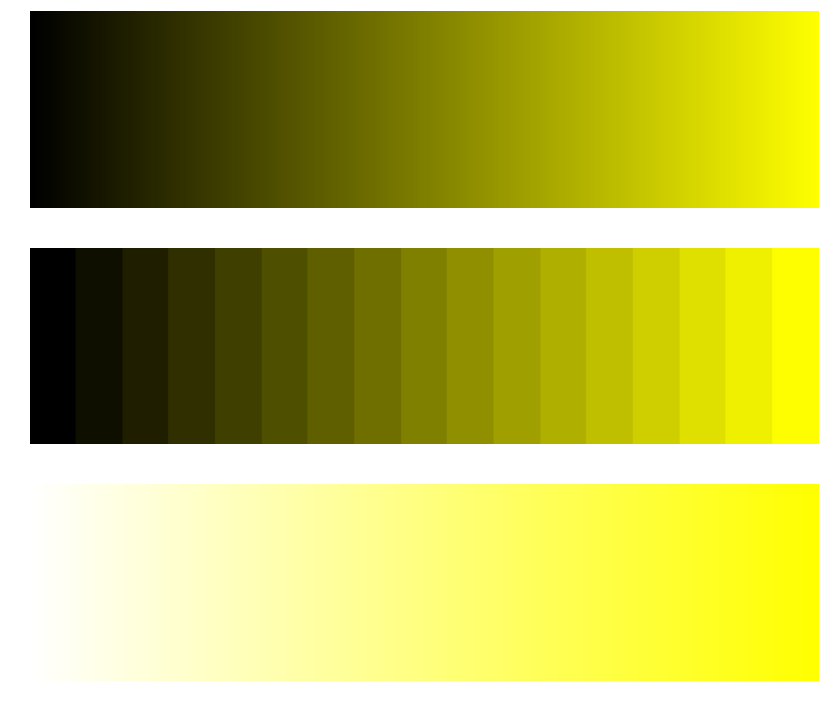

In [57]:
# import test_pattern_generator as tpg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

width = 640
height = 160

"""
変数 color で色を指定。特に断りがなければ配列で設定する。
idxの若い方から順に R,G,B の順。
値域は 0～1。
例を以下に示す。
　灰色：(0.5, 0.5, 0.5)
　赤色：(1, 0, 0)
  黄色：(1, 1, 0)
"""
color = np.array((1.0, 1.0, 0.0))  # 今回は事前に np.array をしておきます
offset = 0.0               # 黒から輝度が増加するグラデーション用
offset_for_sat_grad = 1.0  # 色から彩度が増加するグラデーション用
grad_direction = 'h' # グラデーションがH方向かV方向かを決める
step_num = 16  # 階段状のグラデーションの階段数
step_grad_bit_depth = 8

# まずは世間一般にいうグラデーションを作る
# -----------------------------------------------
img = tpg.gen_gradation_bar(width=width, height=height, color=color,
                            direction='h', offset=offset)

# 滑らかではなく階段状のグラデーションを作る
# -----------------------------------------------
"""下記関数の出力は 0～65535 である。0.0～1.0 ではないので注意！"""
img_step = tpg.gen_step_gradation(width=width, height=height, step_num=17,
                                  bit_depth=step_grad_bit_depth, color=color,
                                  direction='h')

# 彩度方向のグラデーションを作る
# -----------------------------------------------
img_sat_grad = tpg.gen_gradation_bar(width=width, height=height, color=color,
                                     direction='h', offset=offset_for_sat_grad)

# ファイル出力のために int型 に変換
# -------------------------------------
"""省略します"""

# 画像表示
# ------------------
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax1.imshow(img)
ax2.imshow(img_step / np.iinfo(np.uint16).max)  # np.uint16型なので正規化する
ax3.imshow(img_sat_grad)
plt.show()

# 単色グラデーション作成(応用編)
ここでは「水平方向4pxごとに1階調増えるグラーションを作る」みたいな厳しい要求に耐えるグラデーション作成方法を記す。

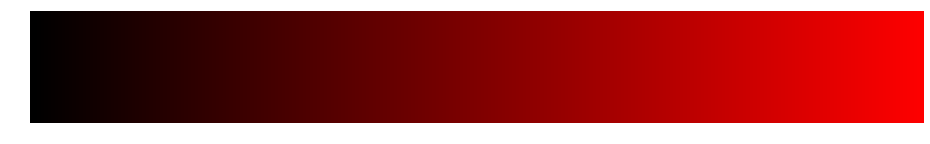

In [60]:
import test_pattern_generator as tpg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

width = 1024
height = 128

"""
変数 color で色を指定。特に断りがなければ配列で設定する。
idxの若い方から順に R,G,B の順。
値域は 0～1。
例を以下に示す。
　灰色：(0.5, 0.5, 0.5)
　赤色：(1, 0, 0)
  黄色：(1, 1, 0)
"""
color = np.array((1.0, 0.0, 0.0))  # 今回は事前に np.array をしておきます
offset = 0.0               # 黒から輝度が増加するグラデーション用
offset_for_sat_grad = 1.0  # 色から彩度が増加するグラデーション用
grad_direction = 'h' # グラデーションがH方向かV方向かを決める
step_grad_bit_depth = 8
step_num = (2 ** step_grad_bit_depth) + 1  # 階段状のグラデーションの階段数

# 1階調ずつ増加する画像を作る。
# -----------------------------------------------
img_step = tpg.gen_step_gradation(width=width, height=height, step_num=step_num,
                                  bit_depth=step_grad_bit_depth, color=color,
                                  direction='h')
# ファイル出力のために int型 に変換
# -------------------------------------
"""省略します"""

# 画像表示
# ------------------
fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(111)
ax1.set_axis_off()
ax1.imshow(img_step / np.iinfo(np.uint16).max)  # np.uint16型なので正規化する
plt.show()

# 複数色グラデーション作成